In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("results_ml.csv")
data = data.drop(["player_kingTowerHitPoints", "opponent_kingTowerHitPoints"], axis=1)
# Data preprocessing and feature engineering 
# Select relevant features and preprocess the data

# Split the dataset into features (X) and target variable (y)
X = data.drop('Winner', axis=1)
y = data['Winner']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost model
model = xgb.XGBClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# save the model for future use
model.save_model('clash_royale_model.model')

Accuracy: 0.7328963030076925


/Users/Chie/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [14:04:48] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [5]:
data = pd.read_csv("results_ml_joined_kk.csv.csv")
data = data.drop(["player_kingTowerHitPoints", "opponent_kingTowerHitPoints"], axis=1)
 
# Shuffle the dataset with a random seed
random_seed = 42
data = data.sample(frac=1, random_state=random_seed)
 
# Split the data into training and testing sets
X = data.drop(['Winner'], axis=1)
y = data['Winner']
 
# Use the last 20,000 rows for testing and the rest for training
X_train = X.iloc[:-20000]
y_train = y.iloc[:-20000]
X_test = X.iloc[-20000:]
y_test = y.iloc[-20000:]


# Create an XGBoost model
model = xgb.XGBClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# save the model for future use
model.save_model('clash_royale_model.model')

Accuracy: 0.73295


/Users/Chie/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [14:05:00] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [6]:
# Create DataFrames
X_test_df = pd.DataFrame(X_test, columns=X.columns)  # Assuming X is a pandas DataFrame
y_test_df = pd.DataFrame({'Actual': y_test})
y_pred_df = pd.DataFrame({'XGBoost Predicted': y_pred})

# Concatenate DataFrames
result_df = pd.concat([X_test_df, y_test_df, y_pred_df], axis=1)

# Export the DataFrame to a CSV file
result_df.to_csv('prediction_results.csv', index=False)

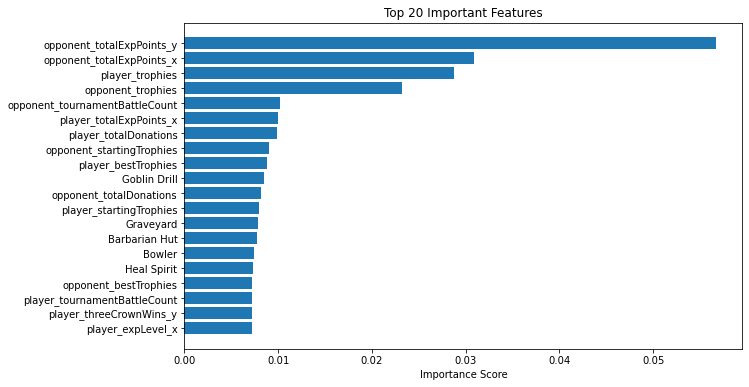

In [7]:
# Get the feature importances
feature_importance = model.feature_importances_

# Get the names of the features 
feature_names = list(X.columns)  

# Create a DataFrame to associate features with their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Extract the top 20 important features
top_20_features = feature_importance_df.head(20)

# Create a bar chart for the top 20 features
plt.figure(figsize=(10, 6))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], align='center')
plt.xlabel('Importance Score')
plt.title('Top 20 Important Features')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()

In [8]:
feature_importance_df.to_csv("XGBOOST_feature_important.csv")

In [9]:
pip install matplotlib graphviz shap

Note: you may need to restart the kernel to use updated packages.


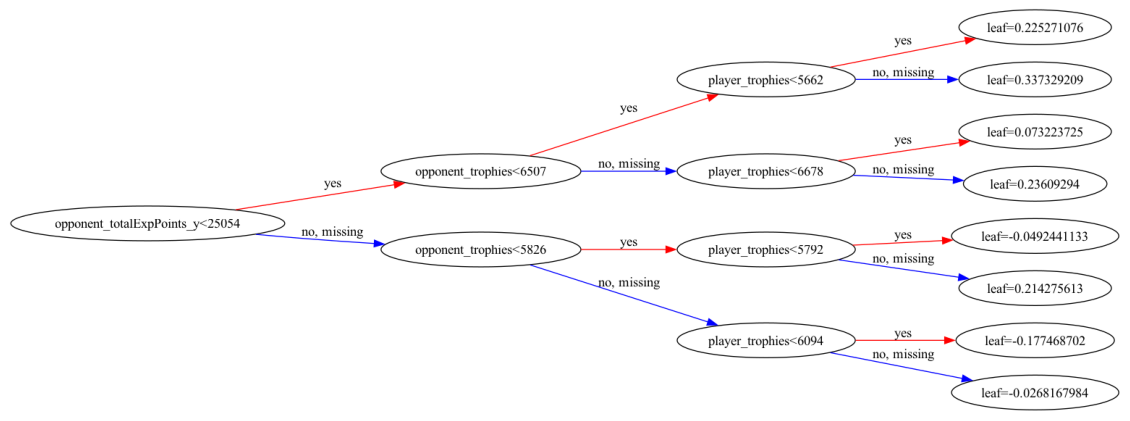

In [10]:

#import xgboost as xgb
from xgboost import plot_tree
#import matplotlib.pyplot as plt

# Fit the XGBoost model
model = xgb.XGBClassifier(max_depth=3)  # Set the maximum depth of the tree (adjust as needed)
model.fit(X_train, y_train)

# Plot a specific tree (change 'tree_index' to the desired tree)
plot_tree(model, num_trees=0, rankdir='LR', ax=plt.figure(figsize=(20,10)).add_subplot(111))  # Change 'num_trees' as needed
plt.show()

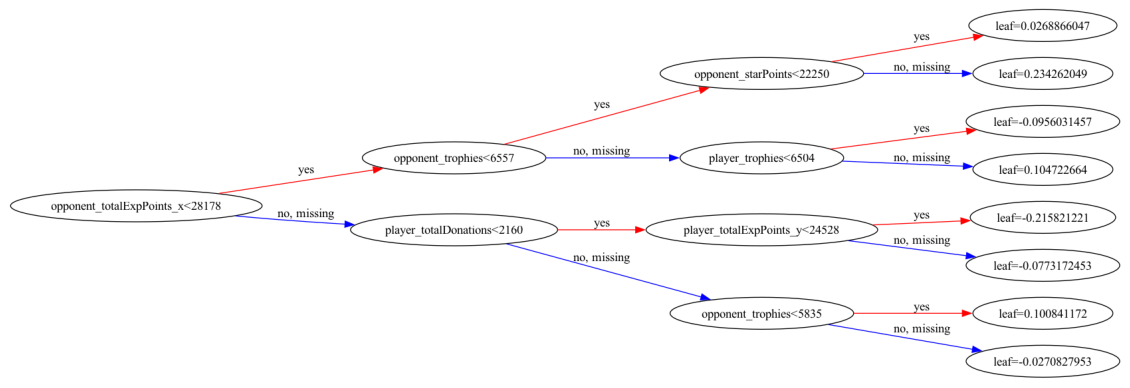

In [11]:

# Plot a specific tree (change 'tree_index' to the desired tree)
plot_tree(model, num_trees=1, rankdir='LR', ax=plt.figure(figsize=(20,10)).add_subplot(111))  # Change 'num_trees' as needed
plt.show()

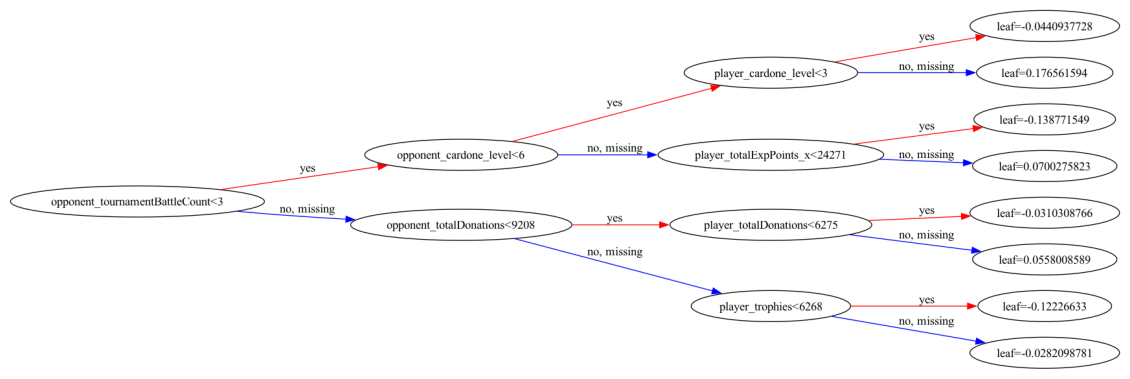

In [12]:
# Plot a specific tree (change 'tree_index' to the desired tree)
plot_tree(model, num_trees=2, rankdir='LR', ax=plt.figure(figsize=(20,10)).add_subplot(111))  # Change 'num_trees' as needed
plt.show()

In [13]:
data_5features = data[["opponent_totalExpPoints_y", "player_trophies", "opponent_totalExpPoints_x", "opponent_trophies", "player_totalDonations"]]
data_5features

,opponent_totalExpPoints_y,player_trophies,opponent_totalExpPoints_x,opponent_trophies,player_totalDonations
53127,55439.0,6117.0,55113,5696.0,3792.0
371,180872.0,5581.0,178618,6548.0,2813.0
186488,40271.0,6248.0,40261,6308.0,71.0
128411,85206.0,6263.0,83671,6317.0,21510.0
92765,0.0,6700.0,0,6734.0,954.0
...,...,...,...,...,...
119879,73829.0,6049.0,73829,6156.0,2286.0
259178,265233.0,6626.0,265195,6615.0,38632.0
131932,732378.0,6165.0,732244,6191.0,44730.0
146867,68637.0,7002.0,68607,6795.0,10908.0


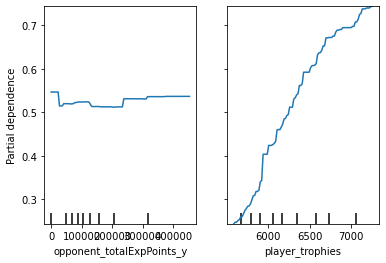

In [14]:
from sklearn.inspection import plot_partial_dependence

# Fit the XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Plot partial dependence for selected features
features_to_plot = ["opponent_totalExpPoints_y","player_trophies"]  # Replace with the indices of the features you want to plot
plot_partial_dependence(model, X_train, features=features_to_plot, grid_resolution=100)
plt.show()

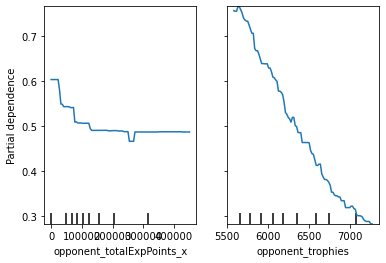

In [15]:
from sklearn.inspection import plot_partial_dependence

# Fit the XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Plot partial dependence for selected features
features_to_plot = ["opponent_totalExpPoints_x", "opponent_trophies"]  # Replace with the indices of the features you want to plot
plot_partial_dependence(model, X_train, features=features_to_plot, grid_resolution=100)
plt.show()